In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
import math
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/spaceship_data/spaceship-titanic/train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df["PassengerId"].duplicated().sum()

0

In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [9]:
df["Cabin"].value_counts().agg(['max', 'mean', 'median'])

max       8.000000
mean      1.294817
median    1.000000
Name: count, dtype: float64

In [10]:
df["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [11]:
df[df["VIP"] == True]["Transported"].value_counts()

Transported
False    123
True      76
Name: count, dtype: int64

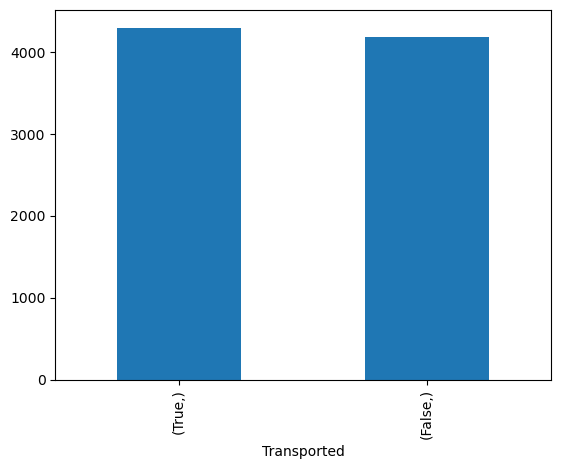

In [12]:
df[df["VIP"] != True][["Transported"]].value_counts().plot(kind="bar");

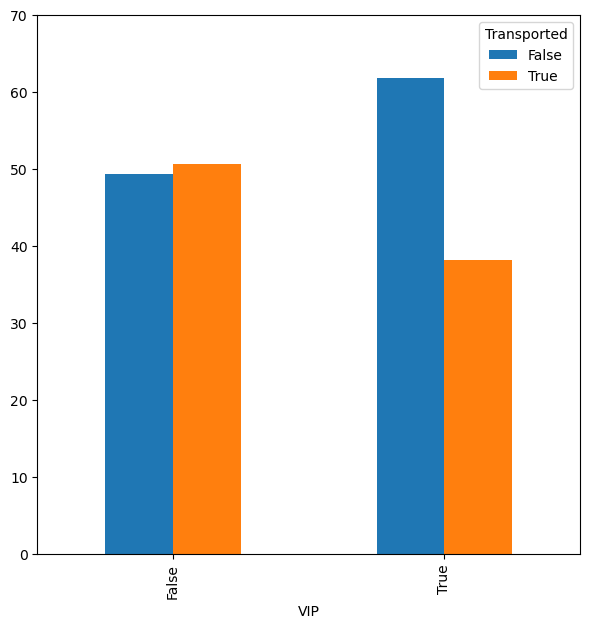

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby("VIP")["Transported"].value_counts(normalize=True).unstack().plot(kind="bar", ax=ax)
ax.set_yticks(np.linspace(0, .7, 8))
ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70]);

### Those who were in cryo-sleep certainly seemed to have a greater likelihood of survival

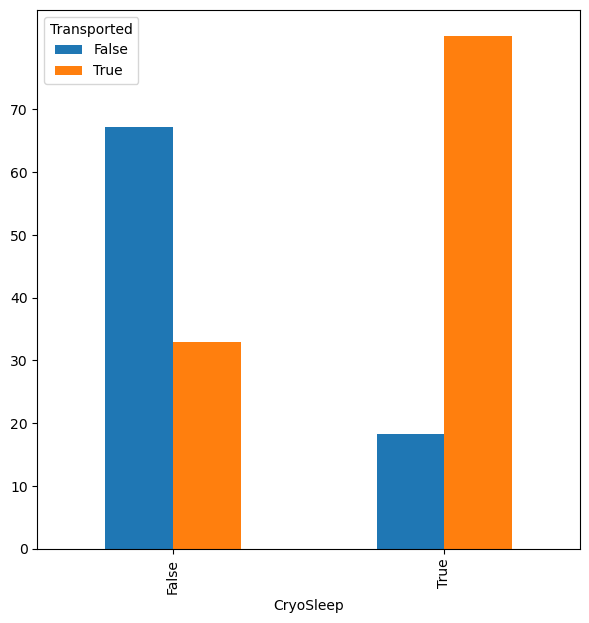

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby("CryoSleep")["Transported"].value_counts(normalize=True).unstack().plot(kind="bar", ax=ax)
ax.set_yticks(np.linspace(0, .7, 8))
ax.set_yticklabels([0, 10, 20, 30, 40, 50, 60, 70]);

<Axes: title={'center': 'Transported'}, ylabel='Frequency'>

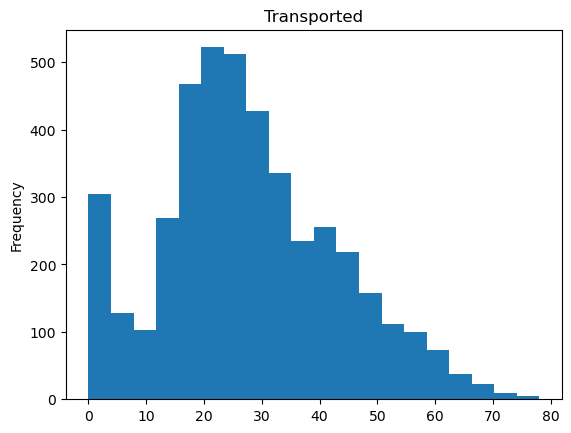

In [15]:
df[df["Transported"] == True]["Age"].plot(kind="hist", bins=20, title="Transported")

<Axes: title={'center': 'Not-Transported'}, ylabel='Frequency'>

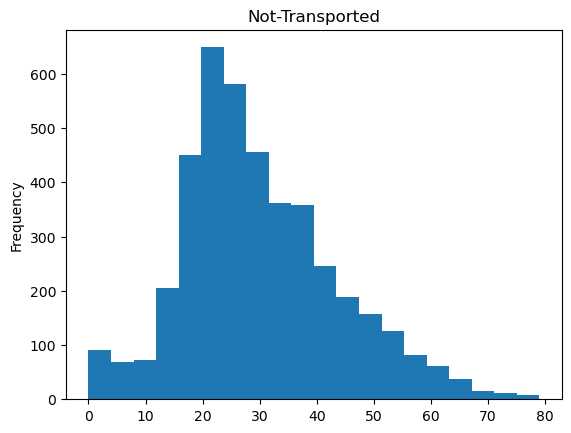

In [16]:
df[df["Transported"] == False]["Age"].plot(kind="hist", bins=20, title="Not-Transported")

<Axes: ylabel='Frequency'>

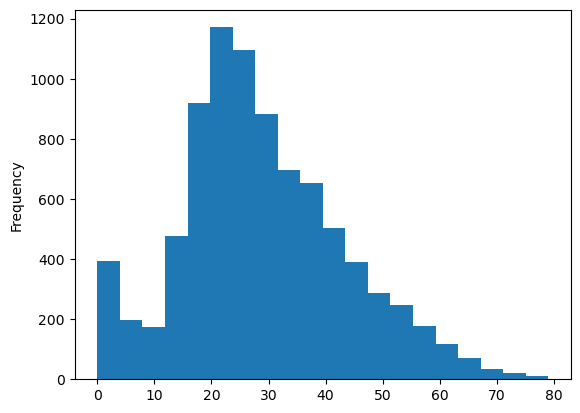

In [17]:
df["Age"].plot(kind="hist", bins=20)

In [18]:
df["ordered_id"] = df["PassengerId"].str.replace("_", "").astype(int)

<hr style="border: 3px solid black">

### Column-wise inspection:

In [19]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'ordered_id'],
      dtype='object')

#### "HomePlanet"
KNN imputer should work fine, add missing indicator, not perfect but adequate

In [20]:
# Going to KNN Impute these values i suppose

df["HomePlanet"].value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

#### "CryoSleep"
KNN imputer should work quite well given those who have cryosleep==True have 0's in most fields

In [21]:
df["CryoSleep"].value_counts(dropna=False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [22]:
df[df["CryoSleep"].isna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,216.000000,215.000000,214.000000,209.000000,212.000000,210.000000,217.000000
mean,27.921296,218.413953,460.920561,145.995215,277.641509,295.142857,479245.769585
std,14.817912,729.552827,1435.890781,370.079039,877.796289,1079.629716,266006.883545
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9902.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,258401.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,496501.000000
75%,37.000000,38.000000,79.750000,5.000000,28.250000,18.000000,705301.000000
max,73.000000,8243.000000,16263.000000,2179.000000,6075.000000,9811.000000,927503.000000


In [23]:
df[df["CryoSleep"].notna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,8298.000000,8297.000000,8296.000000,8276.000000,8298.000000,8295.000000,8476.000000
mean,28.851530,224.850187,458.003857,174.429555,311.994577,305.100663,462933.277725
std,14.480515,665.057747,1615.843798,609.451108,1142.580354,1147.401256,267134.094528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,231476.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,462504.500000
75%,38.000000,47.000000,76.000000,28.000000,61.000000,47.000000,688001.250000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,928002.000000


In [24]:
df[df["CryoSleep"] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0,3037.000000
mean,27.405415,0.0,0.0,0.0,0.0,0.0,460831.868950
std,15.080469,0.0,0.0,0.0,0.0,0.0,268639.555946
min,0.000000,0.0,0.0,0.0,0.0,0.0,602.000000
25%,18.000000,0.0,0.0,0.0,0.0,0.0,232901.000000
50%,26.000000,0.0,0.0,0.0,0.0,0.0,458001.000000
75%,37.000000,0.0,0.0,0.0,0.0,0.0,685801.000000
max,78.000000,0.0,0.0,0.0,0.0,0.0,927801.000000


In [25]:
df[df["CryoSleep"] == False].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,5343.000000,5328.000000,5329.000000,5335.000000,5326.000000,5320.000000,5439.000000
mean,29.651319,350.146772,713.004316,270.586504,486.092940,475.716165,464106.651223
std,14.075540,803.080320,1970.547985,741.756155,1396.233751,1404.174304,266307.325793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230802.500000
50%,27.000000,3.000000,5.000000,2.000000,7.000000,4.000000,464301.000000
75%,38.000000,390.250000,537.000000,242.000000,354.750000,356.000000,689551.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,928002.000000


#### Cabin, going to fillna() with "missing" because there is no need to impute/avoid leakage

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [26]:
df["Cabin"].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [27]:
df.shape

(8693, 15)

In [28]:
len(df["Cabin"].unique())

6561

In [29]:
df["Cabin"].isna().sum()

199

In [30]:
df["Cabin"].fillna(value="x/x/x", inplace=True)

In [35]:
df["deck"] = df["Cabin"].apply(lambda x: str(x).split("/")[0])
df["room_number"] = df["Cabin"].apply(lambda x: str(x).split("/")[1])
df["ship_side"] = df["Cabin"].apply(lambda x: str(x).split("/")[2])

In [36]:
df[["Cabin","deck", "room_number", "ship_side"]]

,Cabin,deck,room_number,ship_side
0,B/0/P,B,0,P
1,F/0/S,F,0,S
2,A/0/S,A,0,S
3,A/0/S,A,0,S
4,F/1/S,F,1,S
...,...,...,...,...
8688,A/98/P,A,98,P
8689,G/1499/S,G,1499,S
8690,G/1500/S,G,1500,S
8691,E/608/S,E,608,S


In [37]:
df["room_number"].unique()

array(['0', '1', '2', ..., '1892', '1893', '1894'], dtype=object)

In [38]:
len(df["Cabin"].unique())

6561

In [39]:
df["Cabin"].isna().sum()

0

#### Destination: KNN Imputer

In [40]:
df["Destination"].value_counts(dropna=False)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

In [41]:
df[df["Destination"].isna()]["Age"].describe()

count    179.000000
mean      30.122905
std       12.956994
min        0.000000
25%       20.000000
50%       29.000000
75%       40.000000
max       62.000000
Name: Age, dtype: float64

#### Age - KNN numeric Imputer

In [42]:
df["Age"].dtype

dtype('float64')

#### VIP - KNN imputer

In [43]:
df["VIP"].value_counts(dropna=False)

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [44]:
df[df["VIP"]==True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,198.000000,195.000000,193.000000,194.000000,197.000000,195.000000,199.000000
mean,37.449495,473.615385,1811.393782,247.726804,760.710660,1234.856410,487084.939698
std,11.611957,1098.363713,3758.336442,587.449429,1622.153873,2453.060817,277494.336527
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,301.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,245701.000000
50%,34.000000,0.000000,287.000000,0.000000,39.000000,30.000000,491701.000000
75%,44.000000,528.500000,2191.000000,161.500000,843.000000,1377.500000,749802.000000
max,73.000000,8243.000000,29813.000000,3700.000000,13902.000000,12424.000000,927601.000000


In [45]:
df[df["VIP"].isna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,197.000000,199.000000,199.000000,199.000000,201.000000,202.000000,203.000000
mean,27.923858,285.457286,440.391960,95.608040,251.000000,295.618812,480058.635468
std,15.267990,898.561166,1785.552459,264.013711,791.475192,1190.303686,277702.472968
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3601.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214001.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,514401.000000
75%,38.000000,89.000000,123.500000,11.500000,85.000000,23.750000,706801.500000
max,65.000000,8209.000000,17432.000000,2048.000000,5907.000000,11325.000000,924801.000000


# Spend Columns - 4 columns

In [46]:
# If Cryo-Sleep == True, no money expenditures

df[df["CryoSleep"] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,ordered_id
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0,3037.000000
mean,27.405415,0.0,0.0,0.0,0.0,0.0,460831.868950
std,15.080469,0.0,0.0,0.0,0.0,0.0,268639.555946
min,0.000000,0.0,0.0,0.0,0.0,0.0,602.000000
25%,18.000000,0.0,0.0,0.0,0.0,0.0,232901.000000
50%,26.000000,0.0,0.0,0.0,0.0,0.0,458001.000000
75%,37.000000,0.0,0.0,0.0,0.0,0.0,685801.000000
max,78.000000,0.0,0.0,0.0,0.0,0.0,927801.000000


In [47]:
# Display NaN counts before fillna
print("Before fillna:")
print(df[df["CryoSleep"] == True][["RoomService", "ShoppingMall", "Spa", "VRDeck"]].isna().sum())

# Fill NaN values
df.loc[df["CryoSleep"] == True, ["RoomService", "ShoppingMall", "Spa", "VRDeck"]] = \
    df.loc[df["CryoSleep"] == True, ["RoomService", "ShoppingMall", "Spa", "VRDeck"]].fillna(value=0)

# Display NaN counts after fillna
print("\nAfter fillna:")
print(df[df["CryoSleep"] == True][["RoomService", "ShoppingMall", "Spa", "VRDeck"]].isna().sum())


Before fillna:
RoomService     68
ShoppingMall    96
Spa             65
VRDeck          62
dtype: int64

After fillna:
RoomService     0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [48]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'ordered_id', 'deck', 'room_number',
       'ship_side'],
      dtype='object')

### Name, Transported, ordered_id don't require any kind of real cleaning, will fill the values with "Missing"

In [49]:
df["Name"].isna().sum()

200

In [50]:
df["Name"].fillna(value="Missing", inplace = True)

In [51]:
df["Name"].isna().sum()

0

### Total Spend

In [52]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'ordered_id', 'deck', 'room_number',
       'ship_side'],
      dtype='object')

In [53]:
df.shape

(8693, 18)

In [54]:
df["total_spend"]= df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis='columns')

In [55]:
quartiles = df["total_spend"].quantile([0.4203, .5, .75])

In [56]:
df["spend_tier"] = pd.cut(df["total_spend"], bins=[-float("inf")] + quartiles.to_list() +[float("inf")], \
       labels=['<=1', '1<-50%', "50-75%", "Top 75%"])

In [57]:
df["spend_tier"].value_counts(sort=False)

spend_tier
<=1        3655
1<-50%      692
50-75%     2173
Top 75%    2173
Name: count, dtype: int64

In [58]:
109+9+25+549+44

736

<hr style="border: 3px solid blue">

In [59]:
df["total_spend"].quantile([.25,.5,.75])

0.25       0.0
0.50     716.0
0.75    1441.0
Name: total_spend, dtype: float64

In [60]:
print(df[df["total_spend"]<=1]["total_spend"].count(),
df[df["total_spend"]>1]["total_spend"].count())

3655 5038


In [61]:
df.shape

(8693, 20)

In [62]:
3655/8693

0.4204532382376625

In [63]:
df["total_spend"].quantile(0.4203)

1.0

/var/folders/xb/zg6pgvbs3rb8pr8f0p_697xr0000gn/T/ipykernel_37684/2335929414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("spend_tier")["Transported"].value_counts(normalize=True).unstack().plot(kind="bar", rot=0);


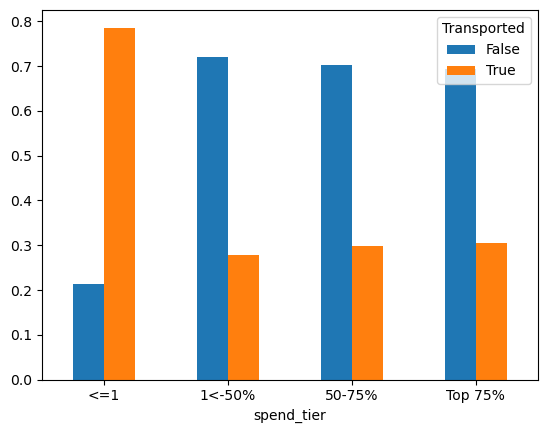

In [68]:
df.groupby("spend_tier")["Transported"].value_counts(normalize=True).unstack().plot(kind="bar", rot=0);

### Revisiting the Passenger info

In [69]:
passenger_stuff = df["PassengerId"].str.split("_", expand=True)
passenger_stuff.columns = ["Passenger_Group", "Group_Member_Number"]

In [70]:
passenger_stuff
df = pd.concat([df, passenger_stuff], axis=1)

In [71]:
df.drop(columns=["ordered_id", "PassengerId"], inplace=True)

In [78]:
df.drop(columns="Cabin", inplace=True)

In [79]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,room_number,ship_side,total_spend,spend_tier,Passenger_Group,Group_Member_Number
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0,<=1,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0,50-75%,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0,Top 75%,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0,Top 75%,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0,50-75%,0004,01


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HomePlanet           8492 non-null   object  
 1   CryoSleep            8476 non-null   object  
 2   Destination          8511 non-null   object  
 3   Age                  8514 non-null   float64 
 4   VIP                  8490 non-null   object  
 5   RoomService          8580 non-null   float64 
 6   FoodCourt            8510 non-null   float64 
 7   ShoppingMall         8581 non-null   float64 
 8   Spa                  8575 non-null   float64 
 9   VRDeck               8567 non-null   float64 
 10  Name                 8693 non-null   object  
 11  Transported          8693 non-null   bool    
 12  deck                 8693 non-null   object  
 13  room_number          8693 non-null   object  
 14  ship_side            8693 non-null   object  
 15  total_spend          

In [81]:
df.isna().sum()

HomePlanet             201
CryoSleep              217
Destination            182
Age                    179
VIP                    203
RoomService            113
FoodCourt              183
ShoppingMall           112
Spa                    118
VRDeck                 126
Name                     0
Transported              0
deck                     0
room_number              0
ship_side                0
total_spend              0
spend_tier               0
Passenger_Group          0
Group_Member_Number      0
dtype: int64

In [82]:
df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [99]:
df.drop(columns="Name", inplace=True)

### T-T-Split

In [100]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spend']

categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'room_number', 'ship_side', \
                       'spend_tier', 'Passenger_Group', 'Group_Member_Number']

df[categorical_columns] = df[categorical_columns].astype(str)

In [101]:
X = df.drop(columns="Transported")
y = df["Transported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.2)

In [102]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer 

In [103]:
df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'deck',
       'room_number', 'ship_side', 'total_spend', 'spend_tier',
       'Passenger_Group', 'Group_Member_Number'],
      dtype='object')

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HomePlanet           8693 non-null   object 
 1   CryoSleep            8693 non-null   object 
 2   Destination          8693 non-null   object 
 3   Age                  8514 non-null   float64
 4   VIP                  8693 non-null   object 
 5   RoomService          8580 non-null   float64
 6   FoodCourt            8510 non-null   float64
 7   ShoppingMall         8581 non-null   float64
 8   Spa                  8575 non-null   float64
 9   VRDeck               8567 non-null   float64
 10  Transported          8693 non-null   bool   
 11  deck                 8693 non-null   object 
 12  room_number          8693 non-null   object 
 13  ship_side            8693 non-null   object 
 14  total_spend          8693 non-null   float64
 15  spend_tier           8693 non-null   o

In [105]:
X_train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'deck', 'room_number',
       'ship_side', 'total_spend', 'spend_tier', 'Passenger_Group',
       'Group_Member_Number'],
      dtype='object')

In [106]:
numeric_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'total_spend']

categorical_columns = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'deck', 'room_number', 'ship_side', \
                       'spend_tier', 'Passenger_Group', 'Group_Member_Number']

num_pipe = Pipeline(steps=[
    ('knn_imp', KNNImputer(add_indicator=True, n_neighbors=5)),
    ("mm_scaler", MinMaxScaler())
])

cat_pipe = Pipeline(steps=[
    ("simple_imp", SimpleImputer(strategy="most_frequent", add_indicator=True)),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

ct = ColumnTransformer(transformers=[
    ("num", num_pipe, numeric_columns),
    ("cat", cat_pipe, categorical_columns)
], remainder="passthrough")


model_pipe = Pipeline(steps=[
    ("ct", ct),
    ("lr", LogisticRegression())
])

model_pipe.fit(X_train, y_train)

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('knn_imp',
                                                                   KNNImputer(add_indicator=True)),
                                                                  ('mm_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck',
                                                   'total_spend']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imp',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'deck',
                                                   'room_number', 'ship_side',
                                                   'spend_tier',
                                                   'Passenger_Group',
                                                   'Group_Member_Number'])])),
                ('lr', LogisticRegression())])

### Logistic Regression

In [107]:
model_pipe.score(X_train, y_train)

0.8800690250215704

In [108]:
model_pipe.score(X_test, y_test)

0.78205865439908

### Random Forest

In [109]:
rf_pipe = Pipeline(steps=[
    ("ct", ct),
    ("rf", RandomForestClassifier())
])

rf_pipe.fit(X_train, y_train)

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('knn_imp',
                                                                   KNNImputer(add_indicator=True)),
                                                                  ('mm_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck',
                                                   'total_spend']),
                                                 ('cat',
                                                  Pipeline(steps=[('simple_imp',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Destination', 'VIP', 'deck',
                                                   'room_number', 'ship_side',
                                                   'spend_tier',
                                                   'Passenger_Group',
                                                   'Group_Member_Number'])])),
                ('rf', RandomForestClassifier())])

In [110]:
rf_pipe.score(X_train, y_train)

1.0

In [111]:
rf_pipe.score(X_test, y_test)

0.8062104657849338

### ExtraTrees

In [112]:
etc_pipe = Pipeline(steps=[
    ("ct", ct),
    ("etc", ExtraTreesClassifier())
])

etc_pipe.fit(X_train, y_train)

print("Train:", etc_pipe.score(X_train, y_train), "Test:", etc_pipe.score(X_test, y_test))

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train: 1.0 Test: 0.7837837837837838


### KNN Classifier

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn_pipe = Pipeline(steps=[
    ("ct", ct),
    ("knn", KNeighborsClassifier())
])

knn_pipe.fit(X_train, y_train)

print("Train:", knn_pipe.score(X_train, y_train), "Test:", knn_pipe.score(X_test, y_test))

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train: 0.8219729651998849 Test: 0.7584818861414606


### XGBoost

In [115]:
xgb_pipe = Pipeline(steps=[
    ("ct", ct),
    ("xgb", XGBClassifier())
])

xgb_pipe.fit(X_train, y_train)

print("Train:", xgb_pipe.score(X_train, y_train), "Test:", xgb_pipe.score(X_test, y_test))

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


Train: 0.8819384526890998 Test: 0.8010350776308223


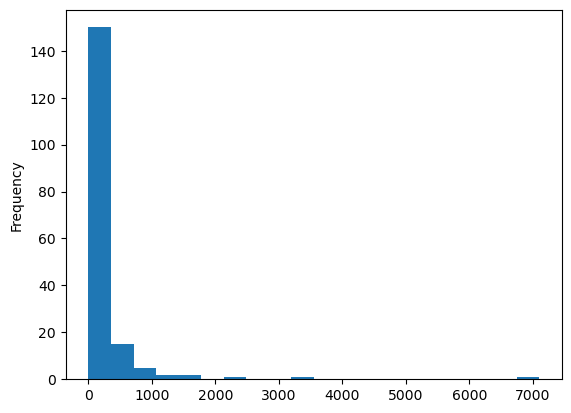

In [71]:
df[df["RoomService"].isna()]["ShoppingMall"].plot(kind="hist", bins=20);

<Axes: ylabel='Frequency'>

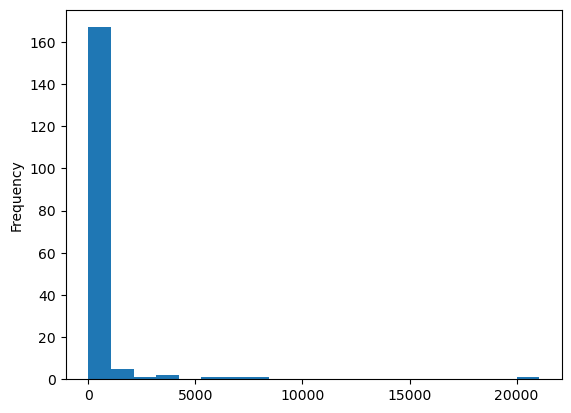

In [70]:
df[df["RoomService"].isna()]["FoodCourt"].plot(kind="hist", bins=20);

In [72]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'ordered_id'],
      dtype='object')

In [60]:
import warnings

# Filter out the FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

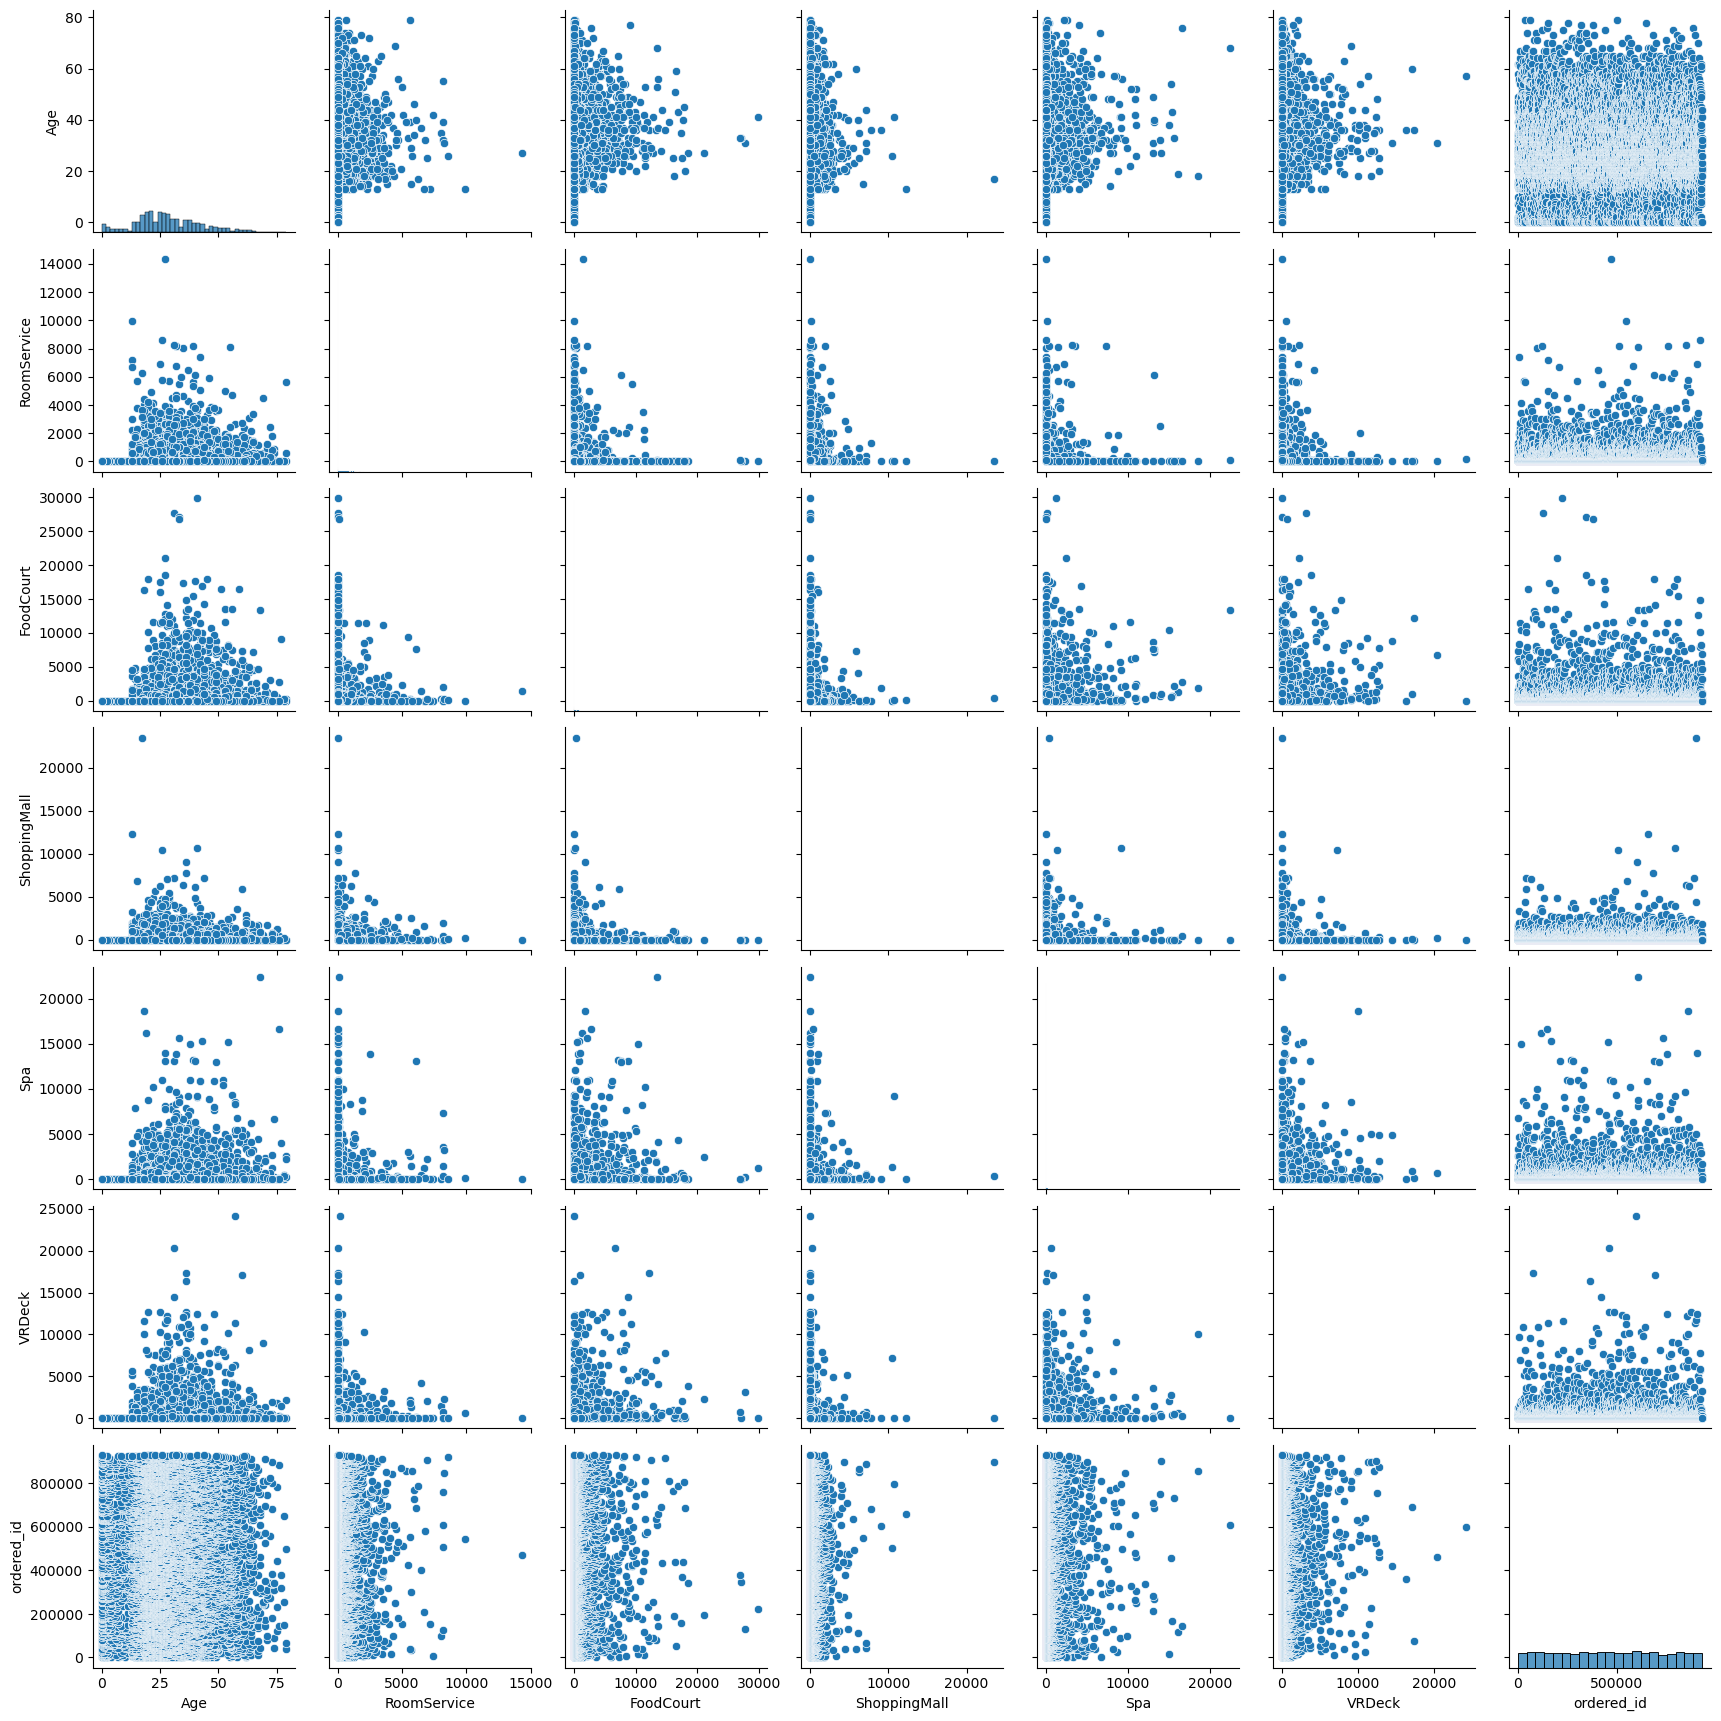

In [61]:
numeric = df.select_dtypes(include=np.number)
sns.pairplot(numeric)